In [429]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [430]:
df = pd.read_csv("../data/salary_data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [432]:
df.duplicated().sum()

4912

In [433]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1791 non-null   float64
 1   Gender               1791 non-null   object 
 2   Education Level      1790 non-null   object 
 3   Job Title            1791 non-null   object 
 4   Years of Experience  1790 non-null   float64
 5   Salary               1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 98.0+ KB


In [434]:
df.isnull().sum()

Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

In [435]:
df = df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   float64
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


In [437]:
# Some statistical info of the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1787.0,35.139899,8.213045,21.0,29.0,33.0,41.0,62.0
Years of Experience,1787.0,9.156128,6.844924,0.0,3.0,8.0,13.0,34.0
Salary,1787.0,113184.659765,51596.536766,350.0,70000.0,110000.0,160000.0,250000.0


In [438]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [439]:
df["Age"].describe()

count    1787.000000
mean       35.139899
std         8.213045
min        21.000000
25%        29.000000
50%        33.000000
75%        41.000000
max        62.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

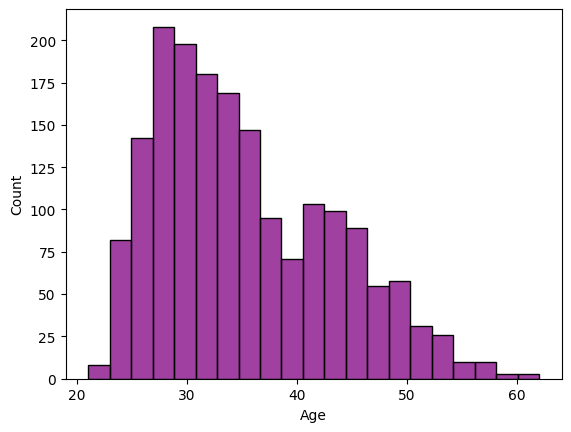

In [440]:
sns.histplot(data=df, x="Age", color="purple")

<Axes: xlabel='Age', ylabel='Density'>

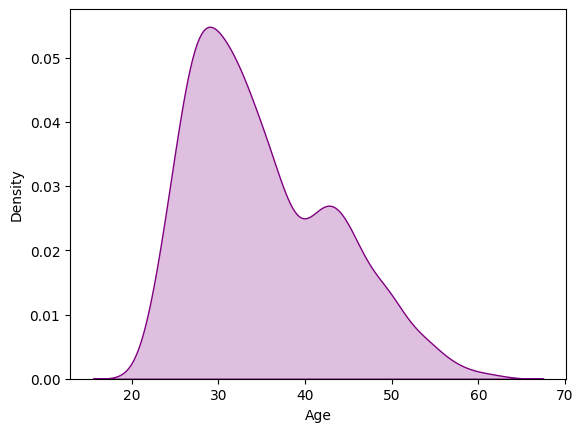

In [441]:
sns.kdeplot(data=df, x="Age", color="purple", fill=True)

Most of the age values lie between the range of 25-40 and then 40-50.

In [442]:
df["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [443]:
df["Gender"].value_counts()

Gender
Male      966
Female    814
Other       7
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

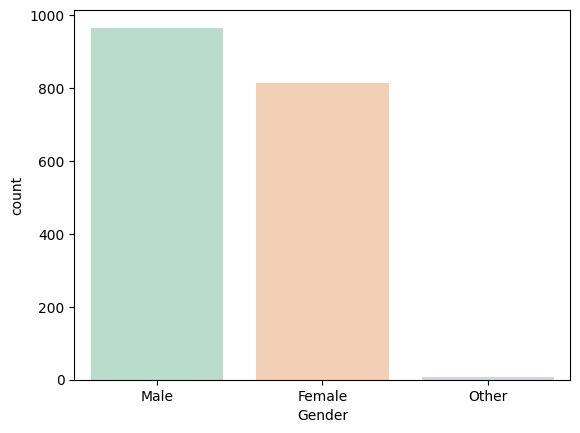

In [444]:
sns.countplot(data=df, x="Gender", palette="Pastel2", hue="Gender")

In dataset, most of the gender is Male, then female as well. The gender 'other' is very less.

In [445]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

<Axes: title={'center': 'Education level distribution'}, ylabel='count'>

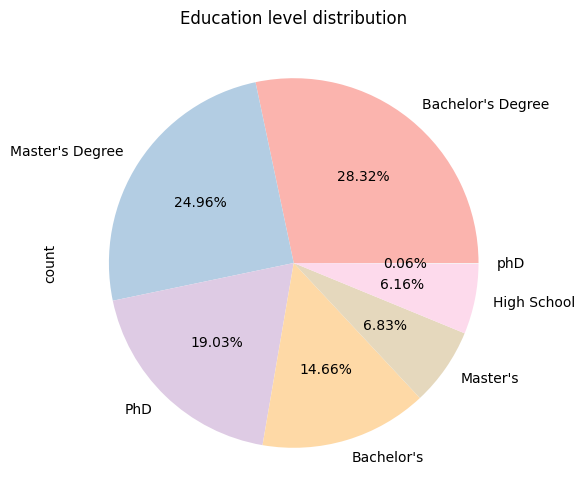

In [446]:
df["Education Level"].value_counts().plot.pie(autopct='%1.2f%%', title="Education level distribution", cmap="Pastel1", figsize=(6,6))

We can see that the Bachelor's and Master's are named differently, even if these are the same thing.

In [447]:
df["Education Level"] = df["Education Level"].replace({"Bachelor's":"Bachelor's Degree", "Master's":"Master's Degree", "phD":"PhD"})

In [448]:
df["Education Level"].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

<Axes: title={'center': 'Education level distribution'}, ylabel='count'>

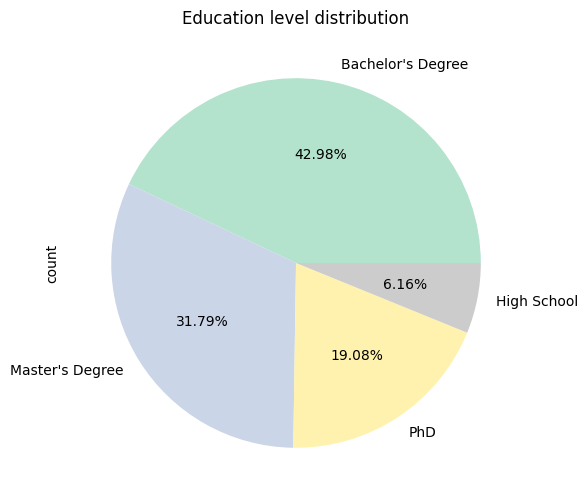

In [449]:
# Plotting the pie plot again
df["Education Level"].value_counts().plot.pie(autopct='%1.2f%%', title="Education level distribution", cmap="Pastel2", figsize=(6,6))

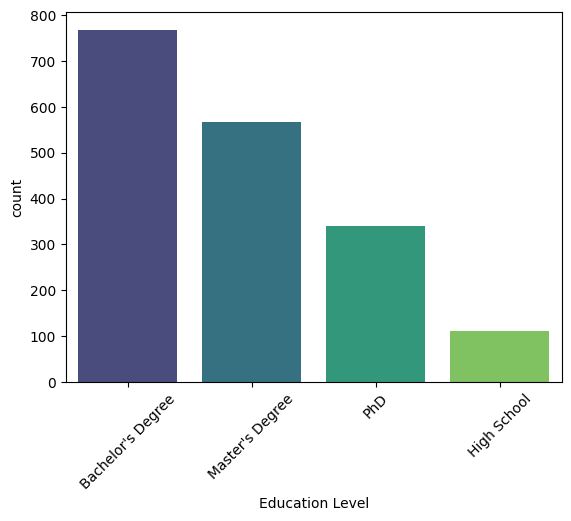

In [450]:
sns.countplot(data=df, x="Education Level", hue="Education Level", palette="viridis")
plt.xticks(rotation=45)
plt.show()

Most of the people have done a bachelor's degree, after that master's degree.

In [451]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

There are so many job titles in this dataset.

In [452]:
df["Job Title"].nunique()

191

In [453]:
df["Job Title"].value_counts()[:10]

Job Title
Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
Data Scientist                80
Software Engineer             78
Front end Developer           71
Marketing Manager             55
Product Manager               53
Name: count, dtype: int64

A lot of job titles. Software Engineer Manager and Full Stack Engineer are in the top on the basis of count. Visualizing this can be a mess.

In [454]:
df["Years of Experience"].describe()

count    1787.000000
mean        9.156128
std         6.844924
min         0.000000
25%         3.000000
50%         8.000000
75%        13.000000
max        34.000000
Name: Years of Experience, dtype: float64

<Axes: xlabel='Years of Experience', ylabel='Count'>

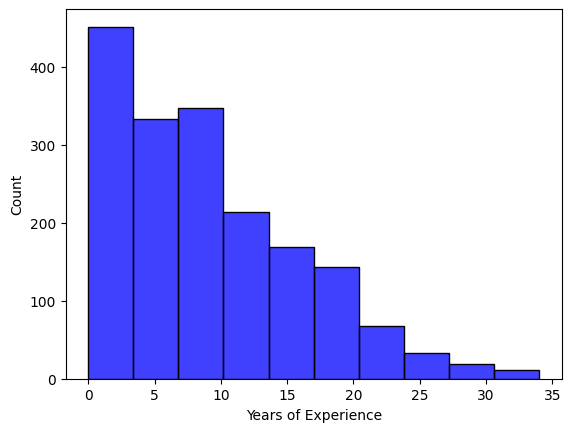

In [455]:
sns.histplot(x="Years of Experience", data=df, color="blue", bins=10)

<Axes: xlabel='Years of Experience', ylabel='Density'>

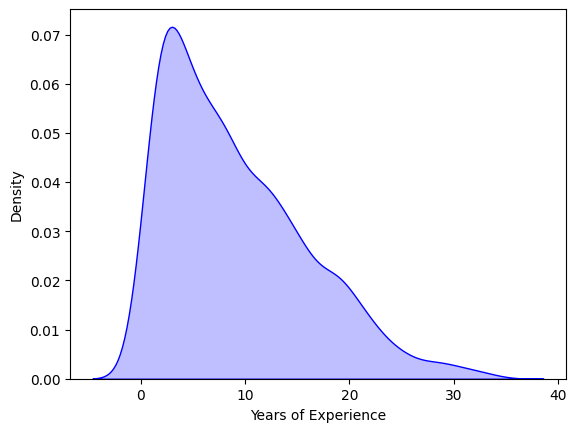

In [456]:
sns.kdeplot(x="Years of Experience", data=df, fill=True, color="blue")

In [457]:
df["Salary"].describe()

count      1787.000000
mean     113184.659765
std       51596.536766
min         350.000000
25%       70000.000000
50%      110000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

Max salary is 2 lakh 50 thousand INR, 350 is the min.  
350 seems way off the salary distribution. It might be an outlier. But we'll see.

<Axes: xlabel='Salary', ylabel='Density'>

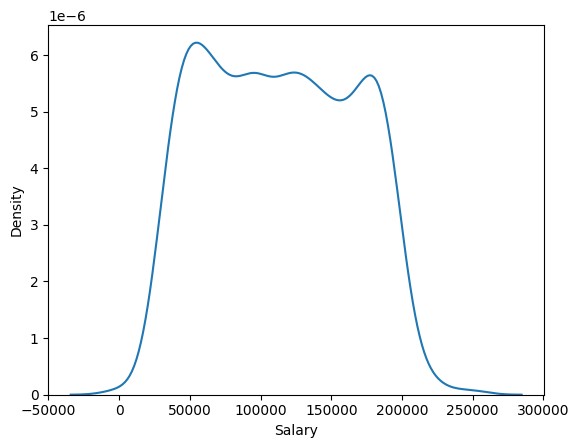

In [458]:
sns.kdeplot(x="Salary", data=df)

<Axes: ylabel='Salary'>

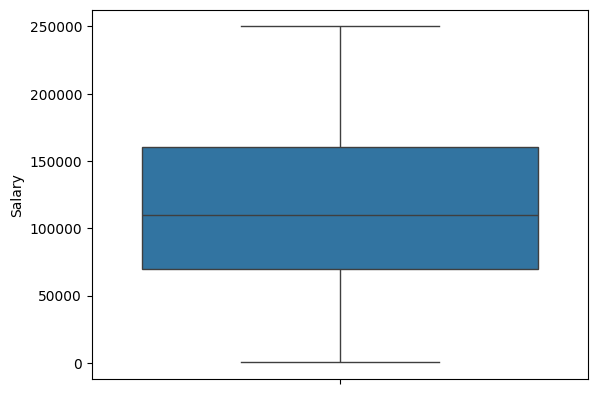

In [459]:
sns.boxplot(y="Salary", data=df)

So far it doesn't look like that there are outliers in this dataset.

In [460]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


<Axes: xlabel='Age', ylabel='Salary'>

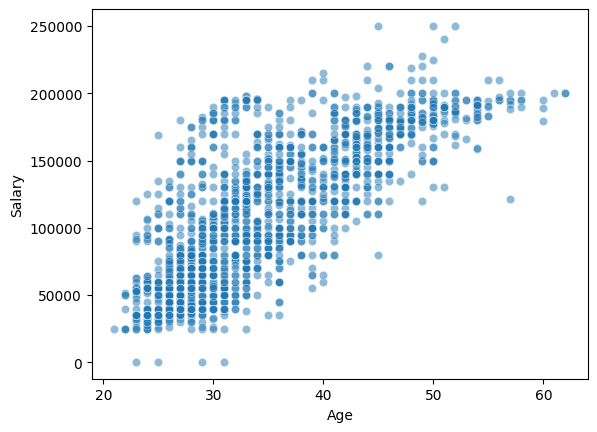

In [461]:
sns.scatterplot(x="Age", y="Salary", data=df, alpha=0.5)

We can see a positive trend. When age increase the salary also increases.

<Axes: xlabel='Age', ylabel='Salary'>

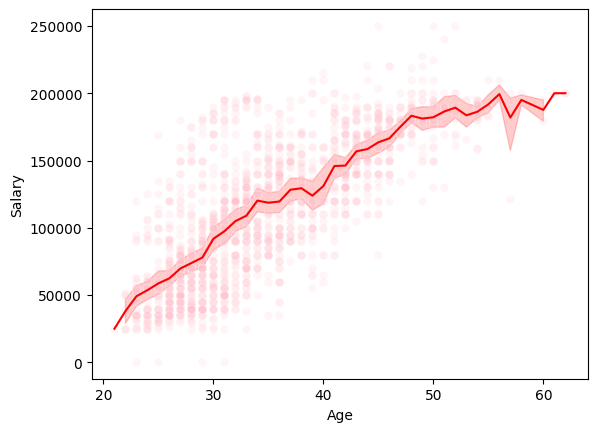

In [462]:
sns.lineplot(x="Age", y='Salary', data=df, color="red")
sns.scatterplot(x="Age", y="Salary", data=df, color="pink", alpha=0.15)

<Axes: xlabel='Age', ylabel='Salary'>

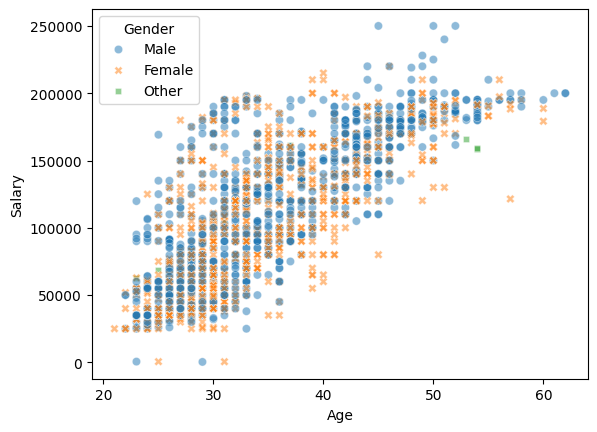

In [463]:
sns.scatterplot(x="Age", y="Salary", data=df, hue="Gender", alpha=0.5, style="Gender")


It's not like males are earning more than female, in this data. The data points overlap, both are earning similar amount, irrespective of the gender.

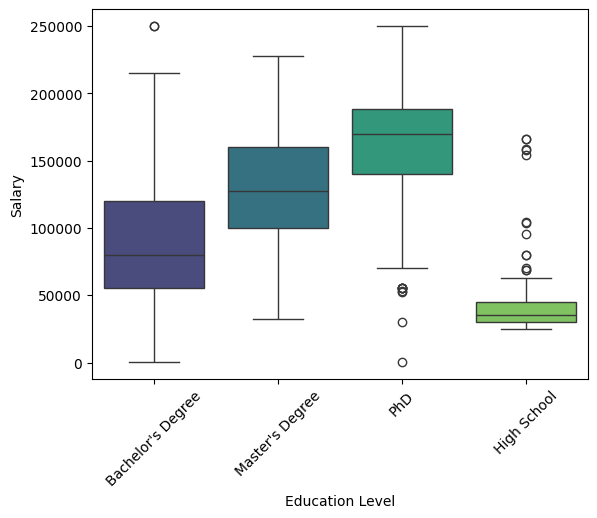

In [464]:
sns.boxplot(x="Education Level", y="Salary", data=df, hue="Education Level", palette="viridis")
plt.xticks(rotation=45)
plt.show()

Phd golders and master's degree earn more money, then comes the bacherlor's degree and then at last high school. Some high school are paid too much. We can that three points are there which are way up the upperbound of the High School boxplot.

And some PHD holders are paid very less.  
Also Bacherlor's degree is paid very hight.  
We must check these values, if these are outliers then we will need to remove these. 

<Axes: title={'center': 'Relation of years of experience with salary'}, xlabel='Years of Experience', ylabel='Salary'>

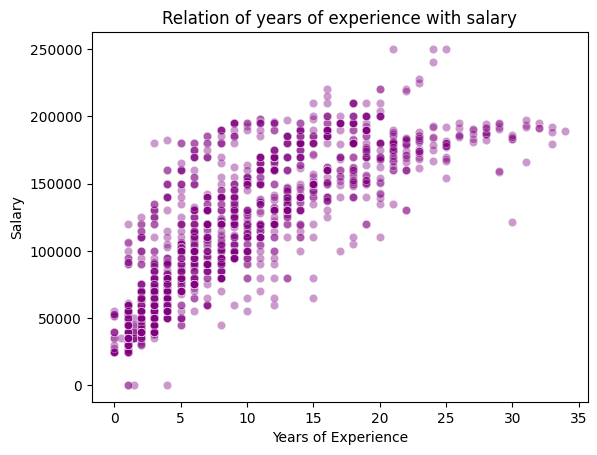

In [465]:
plt.title("Relation of years of experience with salary")
sns.scatterplot(x="Years of Experience", y="Salary", data=df, color="purple", alpha=0.4)

<Axes: xlabel='Years of Experience', ylabel='Salary'>

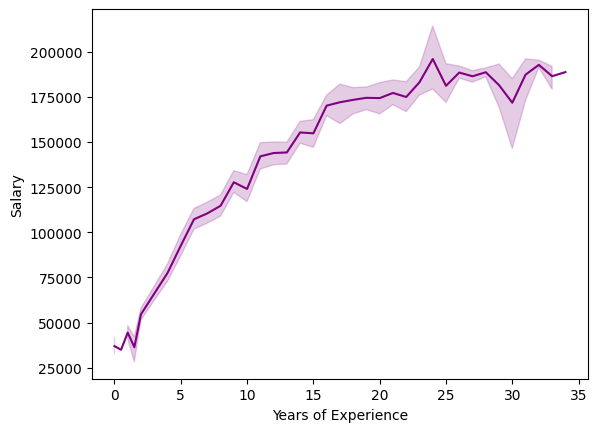

In [466]:
sns.lineplot(x="Years of Experience", y="Salary", data=df, color="purple")

Again there's a positive linear trend. The more experience a person has the more salary that person will get. And this is a very obvious thing.

##### Checking for outliers in case of education level - High School

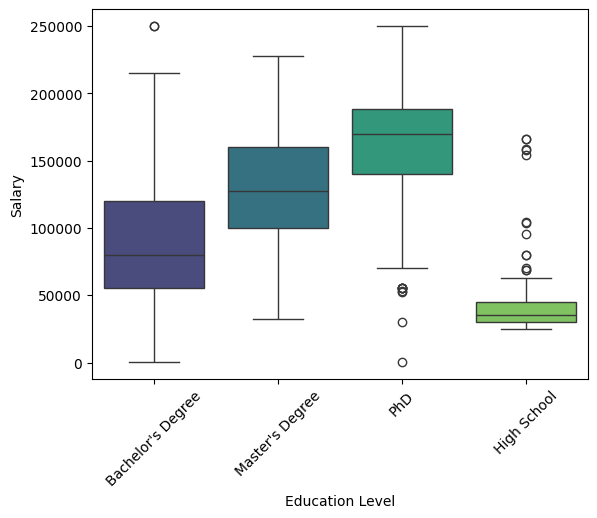

In [467]:
sns.boxplot(x="Education Level", y="Salary", data=df, hue="Education Level", palette="viridis")
plt.xticks(rotation=45)
plt.show()

In [468]:
# Applying conditional filtering to check for outliers
df[(df["Education Level"] == "High School") & (df["Salary"] > 50000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2385,25.0,Other,High School,Full Stack Engineer,2.0,69032.0
2395,30.0,Male,High School,Senior Project Engineer,11.0,103947.0
2403,28.0,Male,High School,Back end Developer,7.0,95845.0
2411,24.0,Female,High School,Senior Project Engineer,1.0,52731.0
2420,43.0,Male,High School,Senior Software Engineer,22.0,165919.0
2429,49.0,Female,High School,Senior Project Engineer,25.0,154207.0
2436,22.0,Female,High School,Back end Developer,0.0,51832.0
2448,31.0,Other,High School,Back end Developer,8.0,104127.0
2454,23.0,Other,High School,Front end Developer,2.0,62852.0


In [469]:
print("These job titles are high paying job titles:")
df[(df["Education Level"] == "High School") & (df["Salary"] > 50000)]["Job Title"].unique()

These job titles are high paying job titles:


array(['Senior Project Engineer', 'Full Stack Engineer',
       'Back end Developer', 'Senior Software Engineer',
       'Front end Developer', 'Junior Web Developer', 'Financial Manager',
       'Sales Executive'], dtype=object)

There are a few people who have studied till High School, and still they are earning a lot. It's because of their job title. All these job titles are high paying job titles.

##### Checking for outliers in case of education level - PHD

In [470]:
df[(df["Education Level"]=="PhD") & (df["Salary"]<65000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2585,23.0,Male,PhD,Software Engineer Manager,0.0,52612.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
2856,23.0,Male,PhD,Software Engineer Manager,0.0,52779.0
6335,24.0,Male,PhD,Digital Marketing Manager,1.0,30000.0
6344,27.0,Female,PhD,Marketing Manager,4.0,55000.0
6369,27.0,Male,PhD,Sales Representative,4.0,55000.0
6383,27.0,Male,PhD,Marketing Manager,4.0,55000.0
6598,28.0,Male,PhD,Marketing Manager,4.0,55000.0
6612,28.0,Male,PhD,Sales Representative,4.0,55000.0


We found one outlier. A software Engineer Manager will never get such low salary, only 579? We need to remove this entry, it's an outlier.

In [471]:
# Remove this row
df = df[df["Salary"]!=579]

In [472]:
# Check for outliers again
df[(df["Education Level"]=="PhD") & (df["Salary"]<65000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2585,23.0,Male,PhD,Software Engineer Manager,0.0,52612.0
2856,23.0,Male,PhD,Software Engineer Manager,0.0,52779.0
6335,24.0,Male,PhD,Digital Marketing Manager,1.0,30000.0
6344,27.0,Female,PhD,Marketing Manager,4.0,55000.0
6369,27.0,Male,PhD,Sales Representative,4.0,55000.0
6383,27.0,Male,PhD,Marketing Manager,4.0,55000.0
6598,28.0,Male,PhD,Marketing Manager,4.0,55000.0
6612,28.0,Male,PhD,Sales Representative,4.0,55000.0


Outlier removed!  

Let's remove 4 more rows.  
These may not be outlier, but removing 4 more rows won't cause any harm.  
We can see there are a few PhD holders whith 4 years of experience and are only earninh 55000.  
This seems a little off.  
Again we can be wrong, but let's drop these.  

In [473]:
df = df.drop(labels=[6344, 6369, 6383, 6598, 6612], axis=0)
df[(df["Education Level"]=="PhD") & (df["Salary"]<65000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2585,23.0,Male,PhD,Software Engineer Manager,0.0,52612.0
2856,23.0,Male,PhD,Software Engineer Manager,0.0,52779.0
6335,24.0,Male,PhD,Digital Marketing Manager,1.0,30000.0


In [474]:
df[(df["Education Level"]=="PhD") & (df["Salary"]<65000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2585,23.0,Male,PhD,Software Engineer Manager,0.0,52612.0
2856,23.0,Male,PhD,Software Engineer Manager,0.0,52779.0
6335,24.0,Male,PhD,Digital Marketing Manager,1.0,30000.0


##### Checking for outliers in case of education level - Bacherlor's Degree

In [475]:
df[(df["Education Level"]=="Bachelor's Degree") & (df["Salary"]>210000)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's Degree,CEO,25.0,250000.0
5001,45.0,Male,Bachelor's Degree,Financial Manager,21.0,250000.0
6034,40.0,Female,Bachelor's Degree,Financial Manager,16.0,215000.0


So here's a CEO, and a Financial Manager. These guys will defintely have high paying job. So these are not outliers.

In [476]:
# Now if we remember there was a point where salary is very low, even less than 500
df["Salary"].min()

350.0

In [477]:
df[df["Salary"]<500]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's Degree,Junior Business Operations Analyst,1.5,350.0


This is also an outlier.

In [478]:
df = df.drop(labels=259, axis=0)
df["Salary"].min() # Let's see the min again

500.0

There's a salary as less as 500, let's check it out. That means there's still more.

In [479]:
df[df["Salary"]==500]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


Again this is an outlier, let's get rid of it.

In [480]:
df = df.drop(labels=4633, axis=0)
# Outliers are occuring again and again let's check if there are any salary less than 1000
df[df["Salary"]<1000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0


And we encounter another outlier. A front end developer can never be that poor.

In [481]:
df = df.drop(labels=1890, axis=0)
# Maybe this is it, all the outliers are gone now!

##### Conclusion:
The data seems good for regression task. Salary is having a positive linearly increasing trend with some major features. Now let's save the processed dataset.

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1778 non-null   float64
 1   Gender               1778 non-null   object 
 2   Education Level      1778 non-null   object 
 3   Job Title            1778 non-null   object 
 4   Years of Experience  1778 non-null   float64
 5   Salary               1778 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.2+ KB


In [483]:
df.to_csv("../data/salary_cleaned.csv", index=False)